<a href="https://colab.research.google.com/github/Parhy/Birds/blob/main/Clasificaci%C3%B3n_de_aves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Autores: Santiago Angulo Flórez, Jean Carlos Portilla Mora**

<img src="https://raw.githubusercontent.com/Parhy/Birds/master/BannerIA2.png" style="width:700px;">

[(Repositorio en GitHub)](https://github.com/Parhy/Birds)

In [ ]:
#@title MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/ai-2-uis-student')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/course-IA2/ai-2-uis-student


In [ ]:
#@title Load libraries { display-mode: "form" }

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
from google.colab import files
print(tf.__version__)

2.4.1


### Descarga de Imagenes 

In [ ]:
# Instalamos nuestros componentes mágicos de kaggle
!pip install  -q kaggle

In [ ]:
# Subimos el archivo de nuestras creedenciales de kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santiagoangulo","key":"d778bc960f0ecf182de8173c5e0bbdd0"}'}

In [ ]:
#! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Las líneas de arriba y estas se resumen en qué damos autroización de almacenamiento.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Descargamos el dataset de células
! kaggle datasets download -d gpiosenka/100-bird-species

100% 1.54G/1.54G [00:19<00:00, 113MB/s]
100% 1.54G/1.54G [00:19<00:00, 84.6MB/s]


In [ ]:
#Descomprimir, solo se hace una vez.
! unzip 100-bird-species.zip

[Acceso a Kaggle desde colab](https://www.kaggle.com/general/74235)

### Tratamiento de los datos

In [ ]:
dir = "/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/" #solo cambia esto y gg

In [ ]:
clases = os.listdir(dir)
num_clases = len(clases)
num_clases

239

In [ ]:
input_shape = (224, 224, 3)
datos_entrenamiento = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.15,
                                   zoom_range=0.5,
                                  )

entrenados = datos_entrenamiento.flow_from_directory(directory=dir,
                                    class_mode='categorical',
                                    target_size=input_shape[0:2],
                                    batch_size=64,
                                    subset="training",
                                    classes=clases,
                                    shuffle=False
                                    )

validados = datos_entrenamiento.flow_from_directory(directory=dir,
                                  class_mode='categorical',
                                  target_size=input_shape[0:2],
                                  batch_size=64,
                                  subset="validation",
                                  classes=clases,
                                  shuffle=False
                                  )

pasos_entrenamiento = entrenados.n // 64
pasos_validacion = validados.n // 64
print("Batches: ", pasos_entrenamiento, "and", pasos_validacion)

Found 28948 images belonging to 239 classes.
Found 7120 images belonging to 239 classes.
Batches:  452 and 111


In [ ]:
dir2= "/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/"
entrenados2 = tf.keras.preprocessing.image_dataset_from_directory(directory=dir2,
                                                                
                                    image_size=(224,224),
                                    batch_size=64,
                                    subset="training",
                                    shuffle=True,
                                    seed=123,
                                    validation_split=0.2
                                    )

Found 36068 files belonging to 239 classes.
Using 28855 files for training.


In [ ]:
nombre_clases = entrenados2.class_names
print(nombre_clases)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN REDSTART', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BANANAQUIT', 'BANDED BROADBILL', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA GULL', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHIPPING SPARROW', 'CHUKAR PARTRIDGE', 'COCK OF THE  ROCK', 'COCKATOO', 'COMMON FIRECREST', 'COMMON GRACKLE', 'COMMON HOUSE MARTIN', 'COMMON LOON', 'COMMON POORW

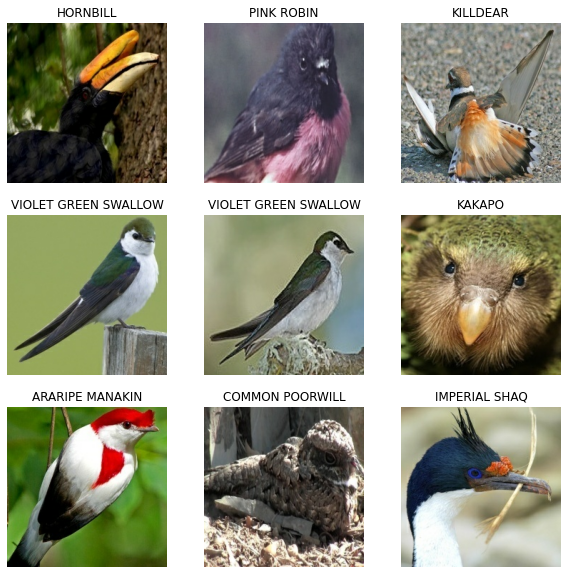

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in entrenados2.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(nombre_clases[labels[i]])
    plt.axis("off")

### Red CNN - MobileNetV2

In [ ]:
model_CNN = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_CNN.trainable = False
model_CNN.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() 
prediction_layer = tf.keras.layers.Dense(num_clases, activation='softmax')

model_CNN_2 = tf.keras.Sequential([
  model_CNN,
  global_average_layer,
  prediction_layer
])

In [ ]:
model_CNN_2.summary()
print("number of layers to train: ", len(model_CNN_2.trainable_variables))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 239)               306159    
Total params: 2,564,143
Trainable params: 306,159
Non-trainable params: 2,257,984
_________________________________________________________________
number of layers to train:  2


In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model_CNN_2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                           patience=2, 
                           mode='auto',
                           restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              mode='auto')

In [ ]:
 history =  model_CNN_2.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=10,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
452/452 [==============================] - 416s 916ms/step - loss: 7.5793 - accuracy: 0.0146 - val_loss: 3.8182 - val_accuracy: 0.1695
Epoch 2/10
452/452 [==============================] - 409s 906ms/step - loss: 3.8307 - accuracy: 0.1551 - val_loss: 3.1893 - val_accuracy: 0.2513
Epoch 3/10
452/452 [==============================] - 408s 904ms/step - loss: 2.9640 - accuracy: 0.2925 - val_loss: 2.5291 - val_accuracy: 0.3830
Epoch 4/10
452/452 [==============================] - 408s 903ms/step - loss: 2.4279 - accuracy: 0.3968 - val_loss: 2.0363 - val_accuracy: 0.4965
Epoch 5/10
452/452 [==============================] - 408s 903ms/step - loss: 2.0307 - accuracy: 0.4940 - val_loss: 1.8184 - val_accuracy: 0.5490
Epoch 6/10
452/452 [==============================] - 408s 902ms/step - loss: 1.8928 - accuracy: 0.5244 - val_loss: 1.7956 - val_accuracy: 0.5597
Epoch 7/10
452/452 [==============================] - 408s 902ms/step - loss: 1.7852 - accuracy: 0.5446 - val_loss: 1.6695 -

#### Análisis de Resultados - Accuracy

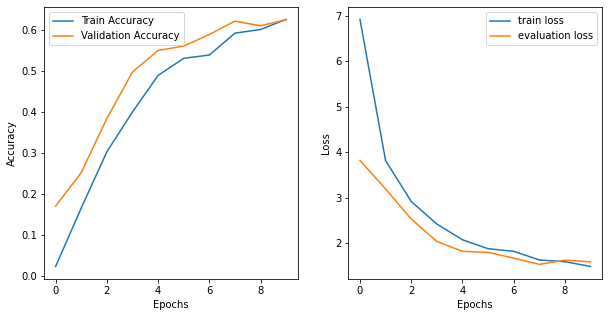

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
!mkdir -p modelos
model_CNN_2.save('modelos/mobilenetnoShu2.h5')

#### Mejorando nuestro acc

In [ ]:
modelnoshu2 = tf.keras.models.load_model('modelos/mobilenetnoShu2.h5')

In [ ]:
modelnoshu2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 239)               306159    
Total params: 2,564,143
Trainable params: 306,159
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                           patience=3, 
                           mode='auto',
                           restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              mode='auto')

In [ ]:
 history =  modelnoshu2.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=10,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
452/452 [==============================] - 13580s 30s/step - loss: 0.7359 - accuracy: 0.8063 - val_loss: 0.8179 - val_accuracy: 0.7970
Epoch 2/10
452/452 [==============================] - 424s 939ms/step - loss: 0.5819 - accuracy: 0.8454 - val_loss: 0.7531 - val_accuracy: 0.8019
Epoch 3/10
452/452 [==============================] - 428s 947ms/step - loss: 0.5692 - accuracy: 0.8491 - val_loss: 0.7752 - val_accuracy: 0.8052
Epoch 4/10
452/452 [==============================] - 431s 954ms/step - loss: 0.5670 - accuracy: 0.8482 - val_loss: 0.7694 - val_accuracy: 0.8042
Epoch 5/10
452/452 [==============================] - 429s 950ms/step - loss: 0.5575 - accuracy: 0.8533 - val_loss: 0.7756 - val_accuracy: 0.8056
Epoch 6/10
452/452 [==============================] - 431s 953ms/step - loss: 0.5493 - accuracy: 0.8548 - val_loss: 0.7480 - val_accuracy: 0.8088
Epoch 7/10
452/452 [==============================] - 429s 950ms/step - loss: 0.5582 - accuracy: 0.8523 - val_loss: 0.7706 -

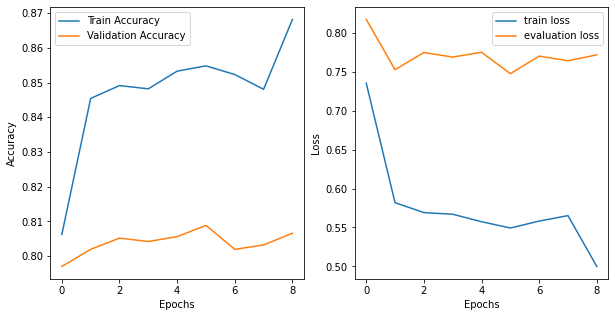

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
modelnoshu2.save('modelos/mobilenetnoShu2.h5')

In [ ]:
modelnoshu2 = tf.keras.models.load_model('modelos/mobilenetnoShu2.h5')

In [ ]:
fig.savefig('AccBest2.svg', format='svg', dpi=1200)
files.download('AccBest2.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Análisis de Resultados - Matriz de confusión

In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
predictions = modelnoshu2.predict_generator(validados,steps=112)
predictions
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([  0,   0,   0, ..., 238, 238, 238])

In [ ]:
true_classes = validados.classes
class_labels = list(validados.class_indices.keys())   
true_classes

array([  0,   0,   0, ..., 238, 238, 238], dtype=int32)

In [ ]:
print(len(predicted_classes),len(true_classes))

7120 7120


In [ ]:
#@title **code:**  Primera Muestra de aves 
ave1=0#@param {type:"integer"}
ave2=3#@param {type:"integer"}
ave3=5#@param {type:"integer"}
ave4=6#@param {type:"integer"}
ave5=8#@param {type:"integer"}
ave6=52#@param {type:"integer"}
ave7=66#@param {type:"integer"}
ave8=82#@param {type:"integer"}
ave9=143#@param {type:"integer"}

In [ ]:
muestra_ave = [class_labels[ave1],
             class_labels[ave2],
             class_labels[ave3],
             class_labels[ave4],
             class_labels[ave5],
             class_labels[ave6],
             class_labels[ave7],
             class_labels[ave8],
             class_labels[ave9]]

In [ ]:
muestra_ave

['AFRICAN CROWNED CRANE',
 'AMERICAN AVOCET',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN REDSTART',
 'COMMON POORWILL',
 'EASTERN MEADOWLARK',
 'GILDED FLICKER',
 'NORTHERN FLICKER']

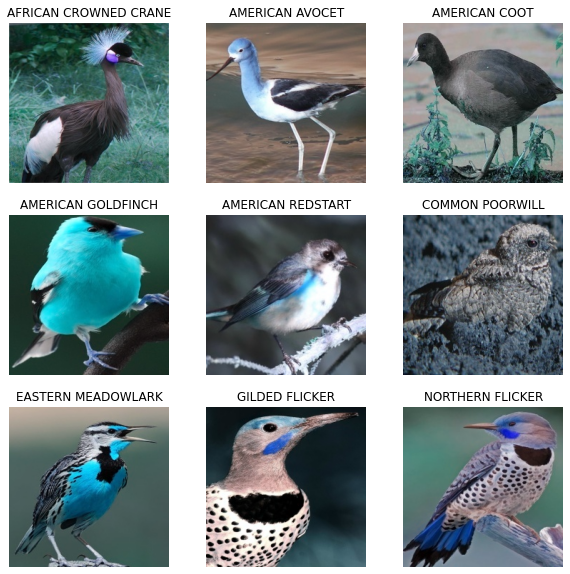

In [ ]:
import cv2
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  image = '/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/'+muestra_ave[i]+'/003.jpg'
  plt.imshow(cv2.imread(image))
  plt.title(muestra_ave[i])
  plt.axis("off")

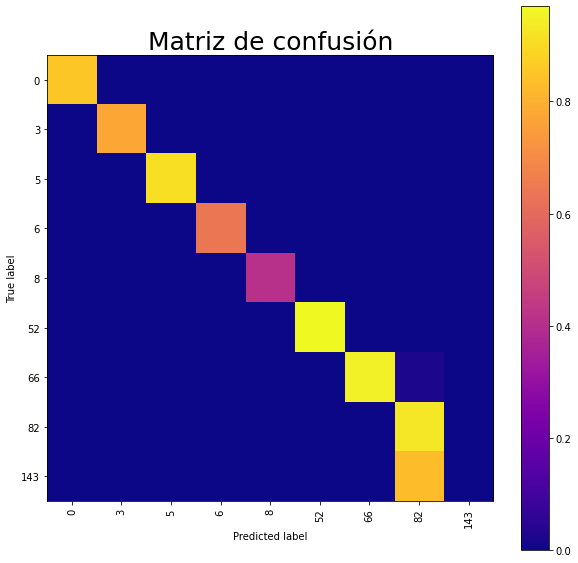

In [ ]:
import scikitplot as skplt
muestra = [ave1,ave2,ave3,ave4,ave5,ave6,ave7,ave8,ave9]
conf_mat = skplt.metrics.plot_confusion_matrix(true_classes, predicted_classes,normalize=True,hide_counts=True,figsize=(10,10),title="Matriz de confusión",title_fontsize=25,cmap="plasma",true_labels=muestra,pred_labels=muestra,x_tick_rotation=90)
plt.show()

In [ ]:
#@title **code:**  Segunda Muestra de aves
ave1=0#@param {type:"integer"}
ave2=3#@param {type:"integer"}
ave3=6#@param {type:"integer"}
ave4=8#@param {type:"integer"}
ave5=12#@param {type:"integer"}
ave6=37#@param {type:"integer"}
ave7=38#@param {type:"integer"}
ave8=217#@param {type:"integer"}
ave9=218#@param {type:"integer"}

In [ ]:
muestra_ave = [class_labels[ave1],
             class_labels[ave2],
             class_labels[ave3],
             class_labels[ave4],
             class_labels[ave5],
             class_labels[ave6],
             class_labels[ave7],
             class_labels[ave8],
             class_labels[ave9]]

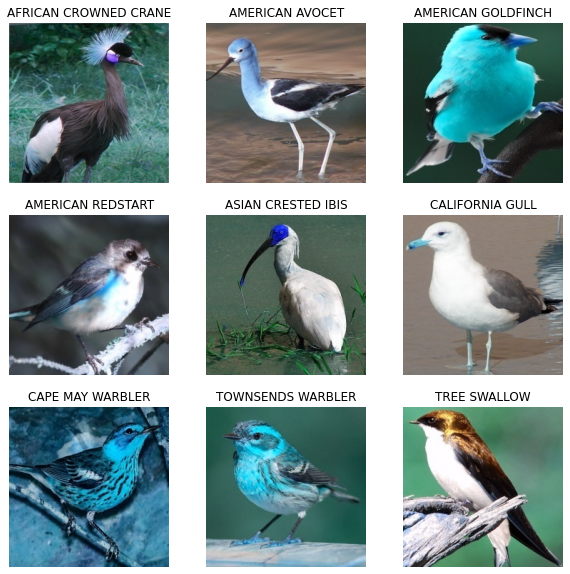

In [ ]:
import cv2
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  image = '/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/'+muestra_ave[i]+'/003.jpg'
  plt.imshow(cv2.imread(image))
  plt.title(muestra_ave[i])
  plt.axis("off")

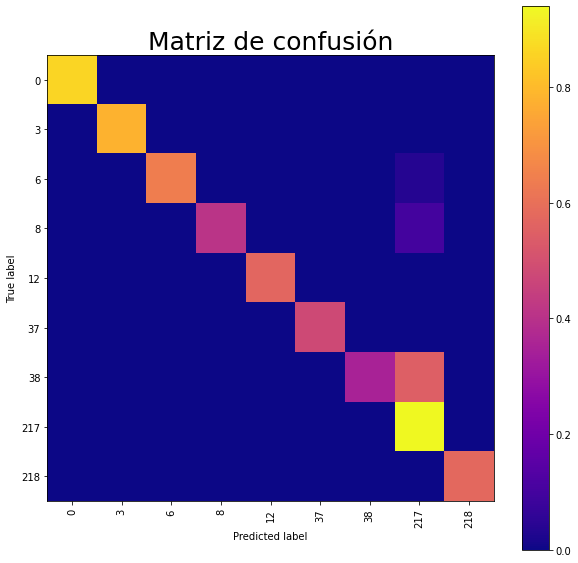

In [ ]:
import scikitplot as skplt
muestra = [ave1,ave2,ave3,ave4,ave5,ave6,ave7,ave8,ave9]
conf_mat = skplt.metrics.plot_confusion_matrix(true_classes, predicted_classes,normalize=True,hide_counts=True,figsize=(10,10),title="Matriz de confusión",title_fontsize=25,cmap="plasma",true_labels=muestra,pred_labels=muestra,x_tick_rotation=90)
plt.show()

In [ ]:
#@title **code:** Tercera Muestra de aves
ave1=0#@param {type:"integer"}
ave2=3#@param {type:"integer"}
ave3=6#@param {type:"integer"}
ave4=8#@param {type:"integer"}
ave5=49#@param {type:"integer"}
ave6=57#@param {type:"integer"}
ave7=58#@param {type:"integer"}
ave8=212#@param {type:"integer"}
ave9=231#@param {type:"integer"}

In [ ]:
muestra_ave = [class_labels[ave1],
             class_labels[ave2],
             class_labels[ave3],
             class_labels[ave4],
             class_labels[ave5],
             class_labels[ave6],
             class_labels[ave7],
             class_labels[ave8],
             class_labels[ave9]]

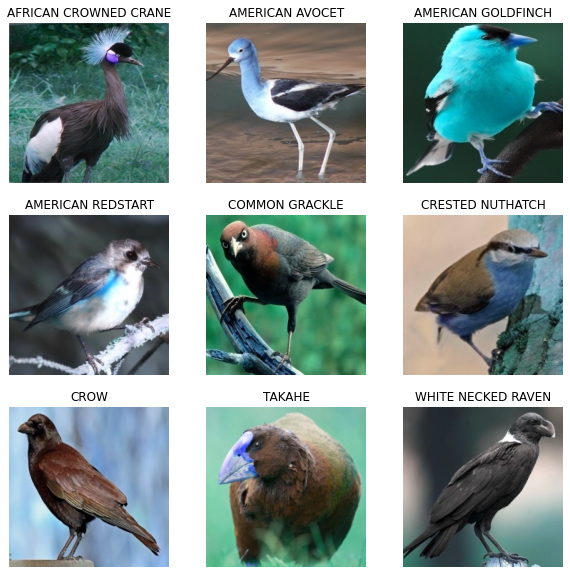

In [ ]:
import cv2
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  image = '/content/drive/My Drive/course-IA2/ai-2-uis-student/birds/'+muestra_ave[i]+'/003.jpg'
  plt.imshow(cv2.imread(image))
  plt.title(muestra_ave[i])
  plt.axis("off")

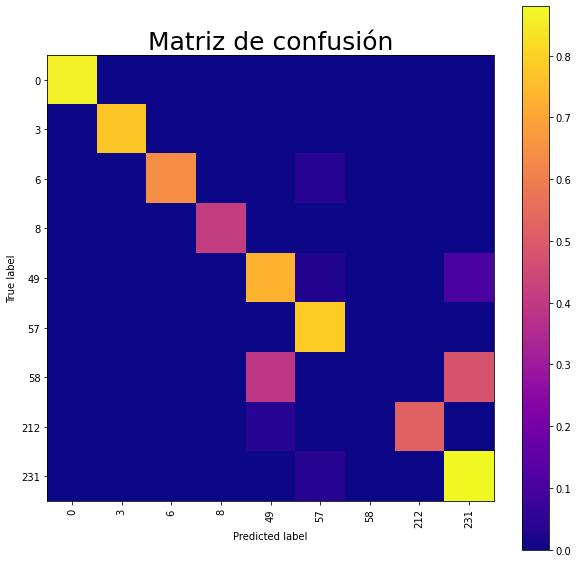

In [ ]:
import scikitplot as skplt
muestra = [ave1,ave2,ave3,ave4,ave5,ave6,ave7,ave8,ave9]
conf_mat = skplt.metrics.plot_confusion_matrix(true_classes, predicted_classes,normalize=True,hide_counts=True,figsize=(10,10),title="Matriz de confusión",title_fontsize=25,cmap="plasma",true_labels=muestra,pred_labels=muestra,x_tick_rotation=90)
plt.show()

###### Matriz de Confusión General

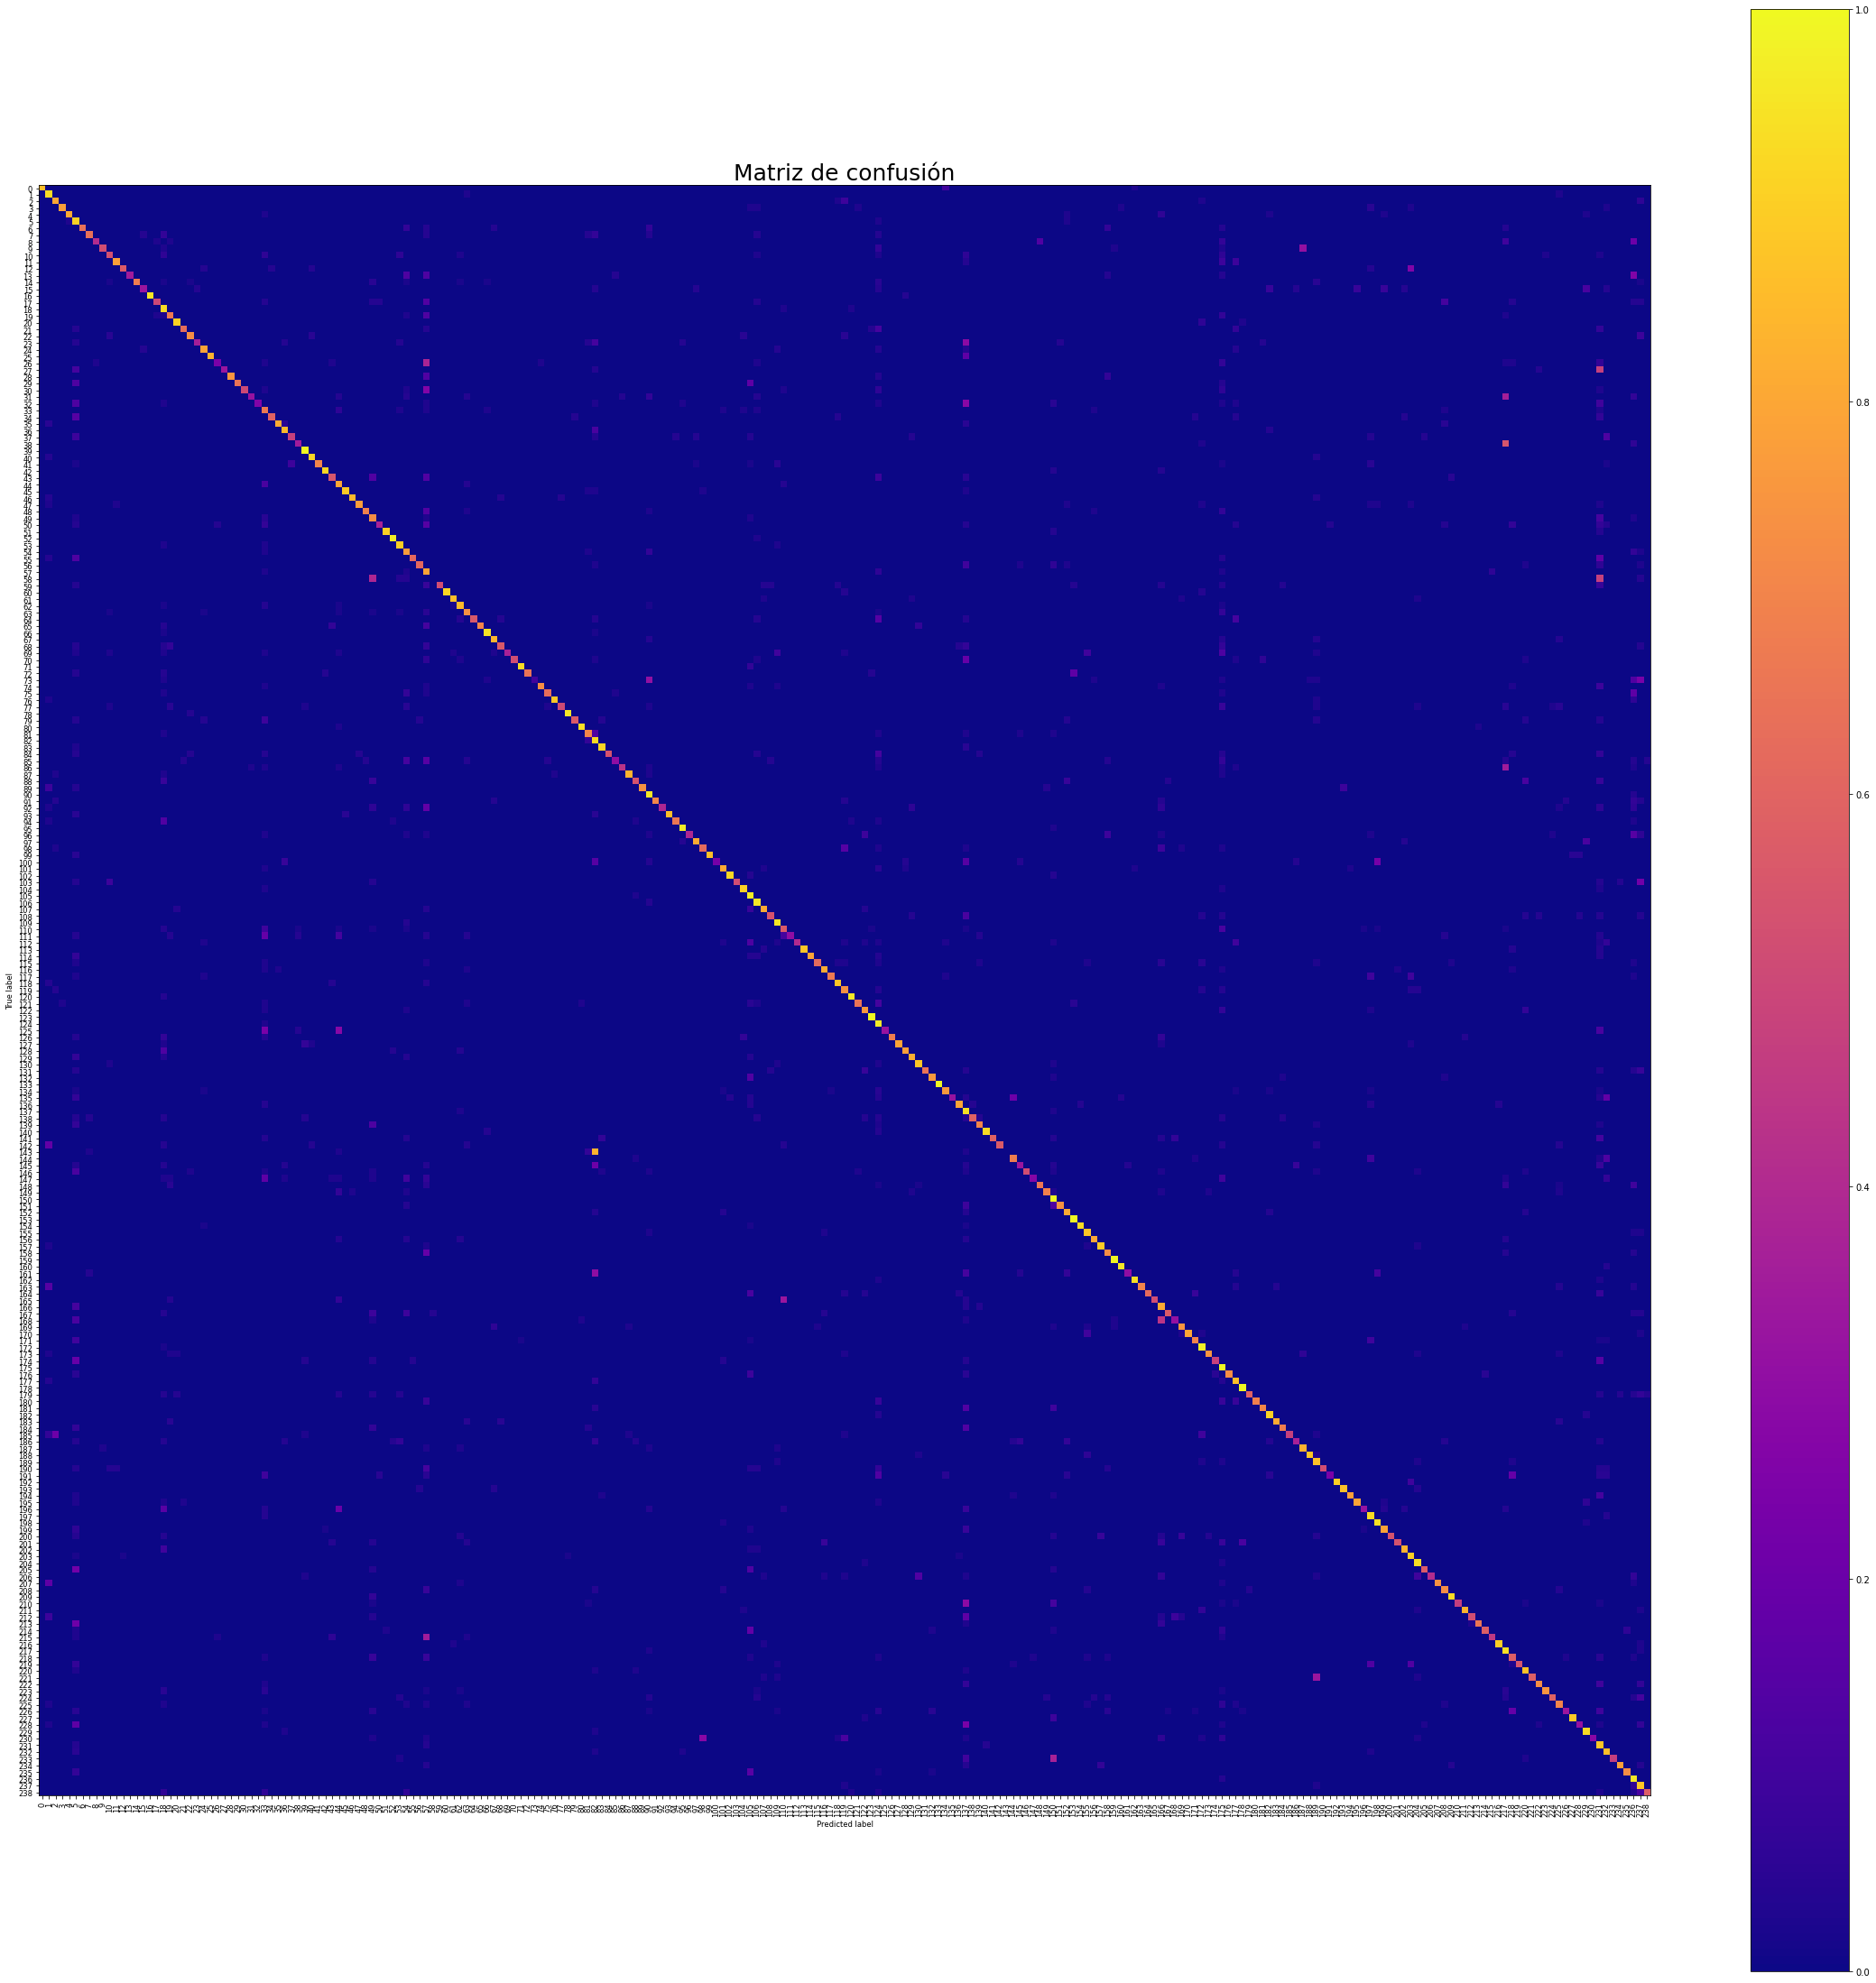

In [ ]:
import scikitplot as skplt
#muestra = [ave1,ave2,ave3,ave4,ave5,ave6,ave7,ave8,ave9]
conf_mat = skplt.metrics.plot_confusion_matrix(true_classes, predicted_classes,hide_counts=True,normalize=True,figsize=(40,40),title="Matriz de confusión",title_fontsize=25,text_fontsize="small",cmap="plasma",x_tick_rotation=90)
plt.show()

Reiichiro Nakano. (2018). reiinakano/scikit-plot: 0.3.7 [Data set]. Zenodo. https://github.com/reiinakano/scikit-plot

### Red CNN - ResNet50

In [ ]:
model_CNN = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_CNN.trainable = False
model_CNN.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
prediction_layer = tf.keras.layers.Dense(num_clases, activation='softmax')
model_CNN_2 = tf.keras.Sequential([
  model_CNN,
  prediction_layer
])

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model_CNN_2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_CNN_2.summary()
print("number of layers to train: ", len(model_CNN_2.trainable_variables))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 7, 7, 239)         489711    
Total params: 24,077,423
Trainable params: 489,711
Non-trainable params: 23,587,712
_________________________________________________________________
number of layers to train:  2


In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
modeload.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22539     
Total params: 42,680,715
Trainable params: 22,539
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           mode='auto',
                           restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1, 
                              patience=2, 
                              verbose=1, 
                              mode='auto')

In [ ]:
 history =  modeload.fit_generator(generator=entrenados, 
                        steps_per_epoch=pasos_entrenamiento,
                        validation_data=validados,
                        validation_steps=pasos_validacion,
                        epochs=20,
                        callbacks=[early_stop, reduce_lr]
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 27s 1s/step - loss: 2.2935 - accuracy: 0.2027 - val_loss: 2.3119 - val_accuracy: 0.1813
Epoch 2/20
20/20 [==============================] - 21s 1s/step - loss: 2.2699 - accuracy: 0.2234 - val_loss: 2.3040 - val_accuracy: 0.1875
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 2.2657 - accuracy: 0.2305 - val_loss: 2.2856 - val_accuracy: 0.1937
Epoch 4/20
20/20 [==============================] - 21s 1s/step - loss: 2.2509 - accuracy: 0.2258 - val_loss: 2.2824 - val_accuracy: 0.1688
Epoch 5/20
20/20 [==============================] - 21s 1s/step - loss: 2.2559 - accuracy: 0.2202 - val_loss: 2.2805 - val_accuracy: 0.1875
Epoch 6/20
20/20 [==============================] - 21s 1s/step - loss: 2.2453 - accuracy: 0.2313 - val_loss: 2.2760 - val_accuracy: 0.1969
Epoch 7/20
20/20 [==============================] - 21s 1s/step - loss: 2.2309 - accuracy: 0.2353 - val_loss: 2.2622 - val_accuracy: 0.2031
Epoch 8/20
20/20 [==

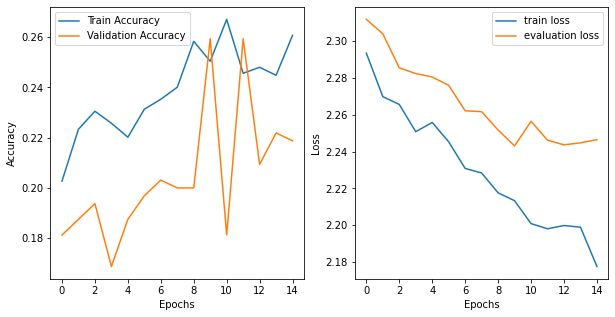

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
modeload.save('modelos/resnet30ep.h5')

In [ ]:
modeload2 = tf.keras.models.load_model('modelos/resnet30ep.h5')

### Conclusiones 


*   MobileNet presenta un aprendizaje mucho mas rápido a diferencia de ResNet por lo que se obtuvo resultados mas óptimos con la MobileNet en los primeros epochs.
*   La red predijo correctamente varias clases de aves, esto se aprecia en la matriz de confusión de las 239 clases, teniendo algunos fallos en aves que compartían rasgos físicos.
*   A la hora de entrenar la red presentamos buenos resultados en cuanto accuracy en los primeros epochs y ya en los últimos se quedo en un 80% tanto de train como de validation, esto pudo ser ya que la MobileNet posee una activación relu 6 que hace forma una constante con el paso del tiempo.

*   El tratamiento manejado al dataset permitió mejorar los resultados iniciales, pasando de accuracy de 0 a 70-80%, se trabajó en primera instancia con una menor cantidad de clases para observar el comportamiento, y se hicieron tratamiento como zoom a las imágenes debido a que en estas el fondo ocupaba la mayor parte del espacio

